In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# **Data Loading and Pre-processing**

## **Importing the data in via - pd.read_csv**

In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Understanding the variables**

As we can see, "Outcome" is what we are trying to predict.

f(x) = y
> f(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) = Outcome

It is a multi-variate analysis. Outcome can either be 1 (i.e. the presence of diabetes) or 0 (i.e. the absense of diabetes)


**Outcome:**<br>
1 = presence of diabetes<br>
2 = absense of diabetes

shape: 768 rows. 9 columns.

## **Cleaning the data**

### **Checking for null values**

In [3]:
df.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Great! There are no null values!

### **Exploring the data further**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

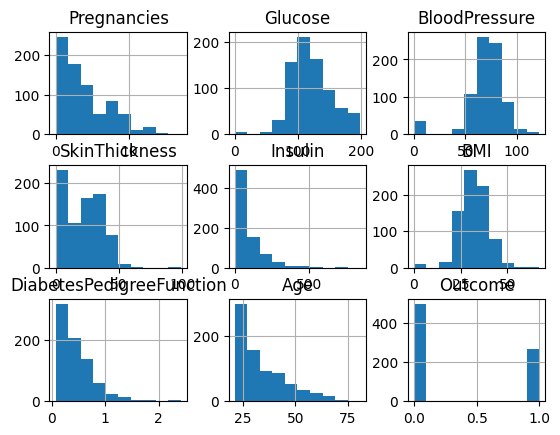

In [5]:
df.hist()

Looks like a lot of the variables seem to be skewed. We might need to normalize if we use Logistic Regression later.

### **Let's look at some correlation**

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Looks like **"BloodPressure"** and **"SkinThickness"** has almost no correlation with the Outcome.

<Axes: >

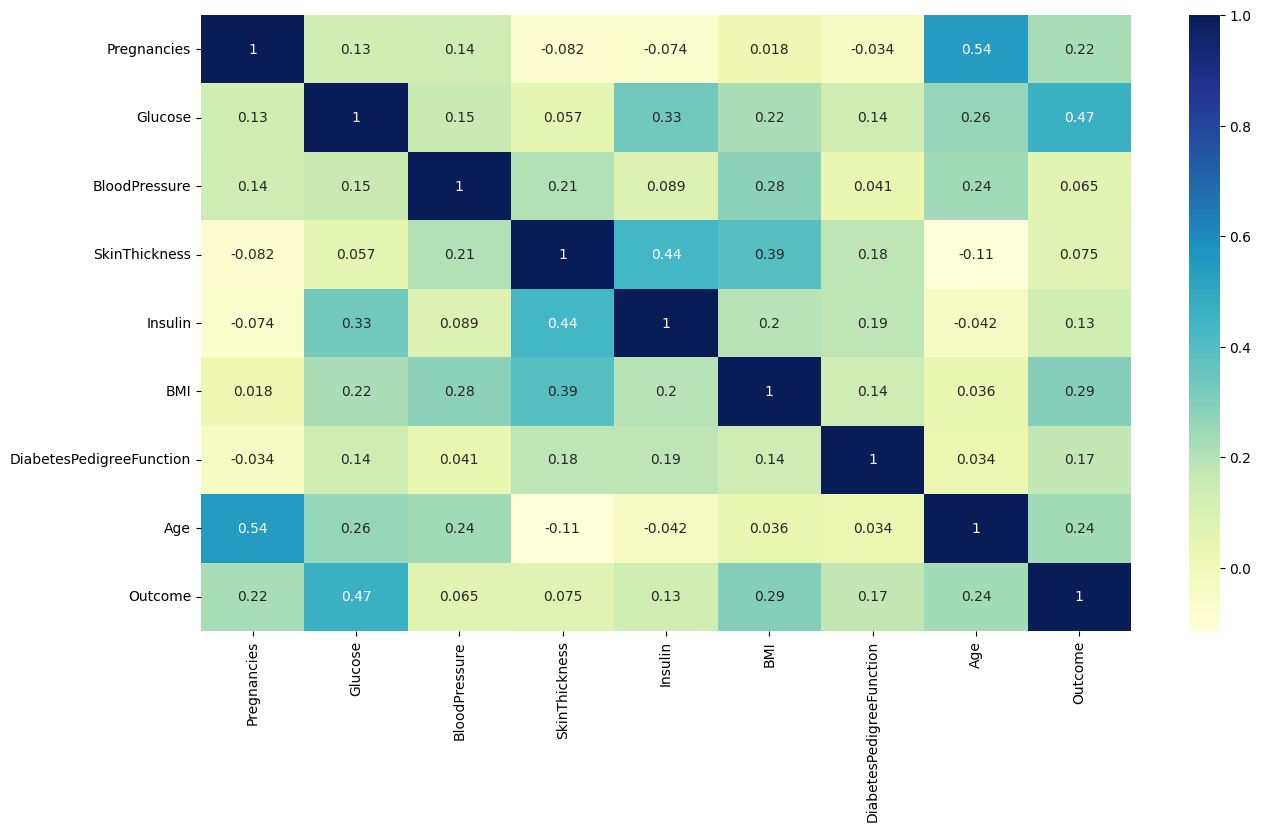

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

By far, **"BMI"** and **"Glucose"** seems to have the strongest correlations with the Outcome, which makes sense

In [8]:
df['AgebyBMI'] = df.Age * df.BMI
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgebyBMI
0,6,148,72,35,0,33.6,0.627,50,1,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,824.6
2,8,183,64,0,0,23.3,0.672,32,1,745.6
3,1,89,66,23,94,28.1,0.167,21,0,590.1
4,0,137,40,35,168,43.1,2.288,33,1,1422.3
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,2072.7
764,2,122,70,27,0,36.8,0.340,27,0,993.6
765,5,121,72,23,112,26.2,0.245,30,0,786.0
766,1,126,60,0,0,30.1,0.349,47,1,1414.7


Let's look at the correlation after creating our new variable **'AgebyBMI'** which basically multiplies "Age" and "BMI".

<Axes: >

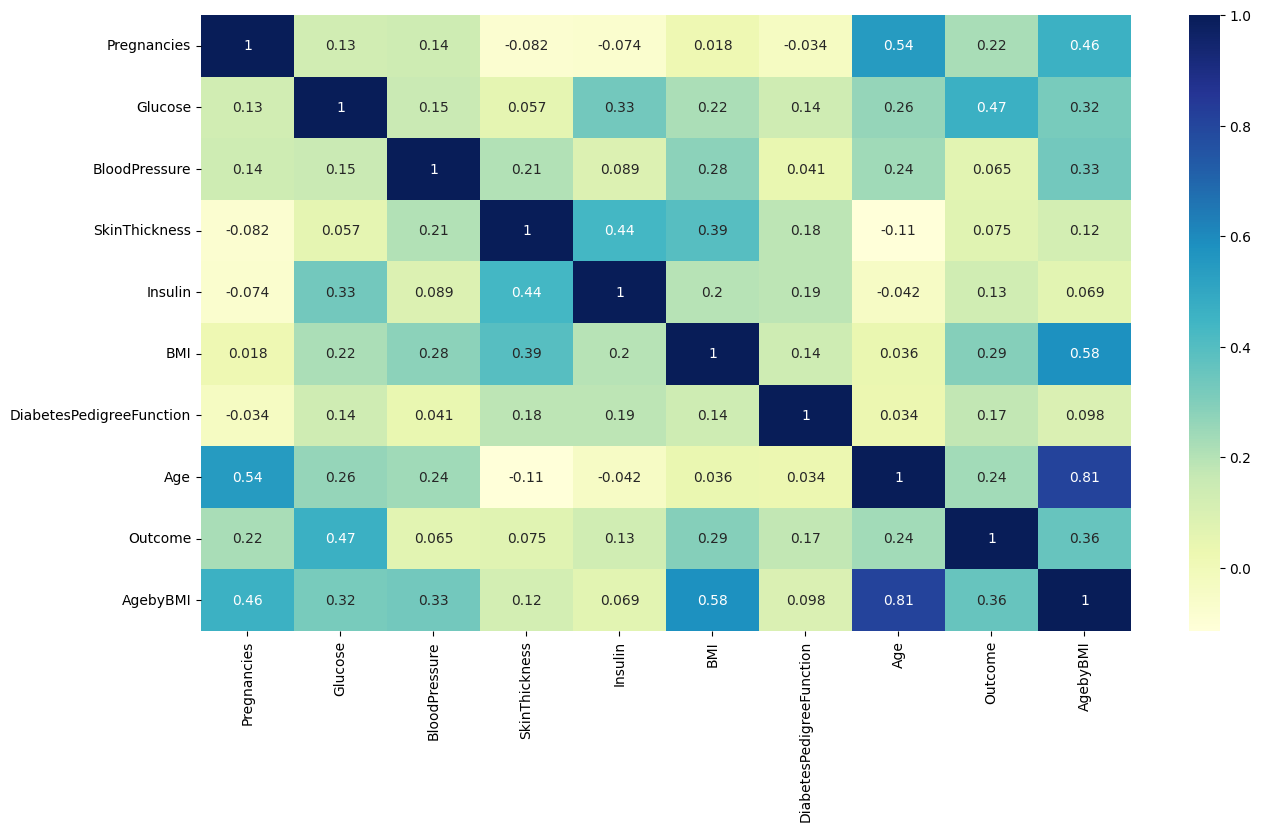

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Age by BMI seems to have a pretty good correlation with Outcome.

**Let's split X and Y**

In [10]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgebyBMI
0,6,148,72,35,0,33.6,0.627,50,1680.0
1,1,85,66,29,0,26.6,0.351,31,824.6
2,8,183,64,0,0,23.3,0.672,32,745.6
3,1,89,66,23,94,28.1,0.167,21,590.1
4,0,137,40,35,168,43.1,2.288,33,1422.3
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,2072.7
764,2,122,70,27,0,36.8,0.340,27,993.6
765,5,121,72,23,112,26.2,0.245,30,786.0
766,1,126,60,0,0,30.1,0.349,47,1414.7


In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## **Train-Test Split**

In [13]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, random_state=0)

# **Model Building**

## **Decision Tree**

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Lets create a function to automatically calculate the accuracy scores

def get_accuracy_score(train_X, val_X, train_y, val_y, max_leaf_nodes):
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state = 0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    ac = accuracy_score(val_y,preds_val)
    return(ac)
    
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

for max_leaf_nodes in candidate_max_leaf_nodes:
    my_ac_score = get_accuracy_score(train_X, val_X, train_y, val_y, max_leaf_nodes)
    print(f'Max leaf nodes: {max_leaf_nodes} \t\t Accuracy Score: {my_ac_score}')   



Max leaf nodes: 5 		 Accuracy Score: 0.7597402597402597
Max leaf nodes: 25 		 Accuracy Score: 0.7597402597402597
Max leaf nodes: 50 		 Accuracy Score: 0.7532467532467533
Max leaf nodes: 100 		 Accuracy Score: 0.7402597402597403
Max leaf nodes: 250 		 Accuracy Score: 0.7402597402597403
Max leaf nodes: 500 		 Accuracy Score: 0.7402597402597403


### **Model Evaluation**

In [15]:
best_tree_size_1 = 5 
best_tree_size_2 = 25

We can see that we get the best accuracy scores with max leaf nodes as **5 and 25**.

## **Random Forest**

With **n_estimators = 100**

In [16]:
from sklearn.ensemble import RandomForestClassifier 

def get_ac_score_rfc(train_X, val_X, train_y, val_y, max_leaf_nodes, n_estimators):
    model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes, random_state = 0, n_estimators= n_estimators)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    ac = accuracy_score(val_y,preds_val)
    return(ac)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    

# First with n_estimatos = 100    
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_ac_score = get_ac_score_rfc(train_X, val_X, train_y, val_y, max_leaf_nodes, n_estimators=100)
    print(f'Max leaf nodes: {max_leaf_nodes} \t\t Accuracy Score: {my_ac_score}')  

Max leaf nodes: 5 		 Accuracy Score: 0.7922077922077922
Max leaf nodes: 25 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 50 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 100 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 250 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 500 		 Accuracy Score: 0.8116883116883117


With **n_estimators = 250**

In [17]:
# With n_estimators = 250
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_ac_score = get_ac_score_rfc(train_X, val_X, train_y, val_y, max_leaf_nodes, n_estimators=250)
    print(f'Max leaf nodes: {max_leaf_nodes} \t\t Accuracy Score: {my_ac_score}')  

Max leaf nodes: 5 		 Accuracy Score: 0.7987012987012987
Max leaf nodes: 25 		 Accuracy Score: 0.7987012987012987
Max leaf nodes: 50 		 Accuracy Score: 0.8181818181818182
Max leaf nodes: 100 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 250 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 500 		 Accuracy Score: 0.8116883116883117


With **n_estimators = 500**

In [18]:
# With n_estimators = 500
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_ac_score = get_ac_score_rfc(train_X, val_X, train_y, val_y, max_leaf_nodes, n_estimators=500)
    print(f'Max leaf nodes: {max_leaf_nodes} \t\t Accuracy Score: {my_ac_score}')  

Max leaf nodes: 5 		 Accuracy Score: 0.7922077922077922
Max leaf nodes: 25 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 50 		 Accuracy Score: 0.8051948051948052
Max leaf nodes: 100 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 250 		 Accuracy Score: 0.8116883116883117
Max leaf nodes: 500 		 Accuracy Score: 0.8116883116883117


With **n_estimators = 1000**

In [19]:
# With n_estimators = 1000
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_ac_score = get_ac_score_rfc(train_X, val_X, train_y, val_y, max_leaf_nodes, n_estimators=1000)
    print(f'Max leaf nodes: {max_leaf_nodes} \t\t Accuracy Score: {my_ac_score}')  

Max leaf nodes: 5 		 Accuracy Score: 0.7987012987012987
Max leaf nodes: 25 		 Accuracy Score: 0.8181818181818182
Max leaf nodes: 50 		 Accuracy Score: 0.8246753246753247
Max leaf nodes: 100 		 Accuracy Score: 0.8181818181818182
Max leaf nodes: 250 		 Accuracy Score: 0.8181818181818182
Max leaf nodes: 500 		 Accuracy Score: 0.8181818181818182


In [20]:
best_node_n_estimator_rfc = {'50': 1000}
# Where key: max_leaf_node
# Where value: n_estimators

**Submission**

In [21]:
model = RandomForestClassifier(max_leaf_nodes = 50, random_state = 0, n_estimators= 100)
model.fit(train_X, train_y)
final_preds_val = model.predict(val_X)


output = pd.DataFrame({'Id':val_X.index,
                      'Outcome': final_preds_val})
output.to_csv('submissions.csv', index=False)